# Lung Cancer

### Data set description
This synthetic dataset includes detailed information on lung cancer patients, such as demographics, medical history, treatment details, and survival outcomes. It closely resembles real-world clinical scenarios, making it useful for predictive modeling, prognosis assessment, and treatment efficacy analysis in lung cancer research.

### Goal
What I hope to discover in the killer graph is what ethnicity lung cancer patients tend to survive the longest (in months).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv('lung_cancer_data.csv')

data.head()


,Patient_ID,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,Patient0000,68,Male,Current Smoker,81.678677,Lower Lobe,Stage III,Surgery,44,Hispanic,...,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,Patient0001,58,Male,Never Smoked,78.448272,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,...,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,Patient0002,44,Male,Former Smoker,67.714305,Lower Lobe,Stage I,Chemotherapy,69,African American,...,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,Patient0003,72,Male,Current Smoker,70.806008,Lower Lobe,Stage III,Chemotherapy,95,African American,...,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,Patient0004,37,Female,Never Smoked,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,...,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23658 entries, 0 to 23657
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        23658 non-null  object 
 1   Age                               23658 non-null  int64  
 2   Gender                            23658 non-null  object 
 3   Smoking_History                   23658 non-null  object 
 4   Tumor_Size_mm                     23658 non-null  float64
 5   Tumor_Location                    23658 non-null  object 
 6   Stage                             23658 non-null  object 
 7   Treatment                         23658 non-null  object 
 8   Survival_Months                   23658 non-null  int64  
 9   Ethnicity                         23658 non-null  object 
 10  Insurance_Type                    23658 non-null  object 
 11  Family_History                    23658 non-null  object 
 12  Como

In [3]:
data.shape

(23658, 38)

In [4]:
data.isna().sum()

Patient_ID                          0
Age                                 0
Gender                              0
Smoking_History                     0
Tumor_Size_mm                       0
Tumor_Location                      0
Stage                               0
Treatment                           0
Survival_Months                     0
Ethnicity                           0
Insurance_Type                      0
Family_History                      0
Comorbidity_Diabetes                0
Comorbidity_Hypertension            0
Comorbidity_Heart_Disease           0
Comorbidity_Chronic_Lung_Disease    0
Comorbidity_Kidney_Disease          0
Comorbidity_Autoimmune_Disease      0
Comorbidity_Other                   0
Performance_Status                  0
Blood_Pressure_Systolic             0
Blood_Pressure_Diastolic            0
Blood_Pressure_Pulse                0
Hemoglobin_Level                    0
White_Blood_Cell_Count              0
Platelet_Count                      0
Albumin_Leve

In [5]:
data.describe()

,Age,Tumor_Size_mm,Survival_Months,Performance_Status,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Blood_Pressure_Pulse,Hemoglobin_Level,White_Blood_Cell_Count,Platelet_Count,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
count,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,...,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000,23658.000000
mean,54.439344,55.383736,59.863809,1.999915,134.462381,84.475780,79.585299,14.000137,6.735637,299.867482,...,22.504677,30.133226,0.999459,174.734575,9.261114,3.742771,109.895553,4.245646,140.028215,49.913594
std,14.396386,26.004354,34.246042,1.413675,26.020492,14.409826,11.546690,2.301411,1.879292,86.897568,...,10.047864,11.560915,0.287517,43.230997,0.719875,0.721708,23.109136,0.431968,2.894568,28.870940
min,30.000000,10.004279,1.000000,0.000000,90.000000,60.000000,60.000000,10.000070,3.501213,150.017892,...,5.001090,10.000860,0.500001,100.002721,8.000018,2.500069,70.000420,3.500034,135.000934,0.016800
25%,42.000000,32.972797,30.000000,1.000000,112.000000,72.000000,70.000000,11.990625,5.108723,224.884576,...,13.816180,20.065339,0.748845,137.444977,8.640877,3.120107,89.828616,3.871842,137.540078,25.026793
50%,54.000000,55.296297,60.000000,2.000000,134.000000,85.000000,80.000000,13.983383,6.729774,299.933443,...,22.547943,30.271772,1.001183,174.390634,9.259304,3.730837,109.949488,4.242236,140.002209,49.926220
75%,67.000000,78.190014,89.000000,3.000000,157.000000,97.000000,90.000000,15.999260,8.353701,375.437029,...,31.092935,40.107488,1.249173,212.228273,9.883248,4.364422,130.061977,4.618318,142.541883,74.924580
max,79.000000,99.990554,119.000000,4.000000,179.000000,109.000000,99.000000,17.999957,9.999535,449.974734,...,39.999543,49.998571,1.499998,249.996391,10.499913,4.999974,149.997056,4.999954,144.999869,99.999493


In [6]:
data.drop(['Patient_ID'], axis=1, inplace=True)
data.head()

,Age,Gender,Smoking_History,Tumor_Size_mm,Tumor_Location,Stage,Treatment,Survival_Months,Ethnicity,Insurance_Type,...,Alanine_Aminotransferase_Level,Aspartate_Aminotransferase_Level,Creatinine_Level,LDH_Level,Calcium_Level,Phosphorus_Level,Glucose_Level,Potassium_Level,Sodium_Level,Smoking_Pack_Years
0,68,Male,Current Smoker,81.678677,Lower Lobe,Stage III,Surgery,44,Hispanic,Medicare,...,27.985571,46.801214,1.245849,239.240255,10.366307,3.547734,113.919243,4.968163,139.822861,17.006956
1,58,Male,Never Smoked,78.448272,Lower Lobe,Stage I,Radiation Therapy,101,Caucasian,Private,...,30.120956,39.711531,1.463231,233.515237,10.081731,2.945020,101.321578,3.896795,135.449361,93.270893
2,44,Male,Former Smoker,67.714305,Lower Lobe,Stage I,Chemotherapy,69,African American,Other,...,5.882418,32.640602,0.630109,169.037460,8.660892,4.637399,78.214177,4.369050,143.377155,70.348376
3,72,Male,Current Smoker,70.806008,Lower Lobe,Stage III,Chemotherapy,95,African American,Medicare,...,38.908154,44.319393,0.594342,213.967590,8.832669,3.617098,127.895361,4.348474,138.586005,19.828128
4,37,Female,Never Smoked,87.272433,Lower Lobe,Stage IV,Radiation Therapy,105,Asian,Medicaid,...,26.344877,15.746906,1.478239,118.187543,9.247609,4.773255,148.801185,3.671976,141.230724,81.047456


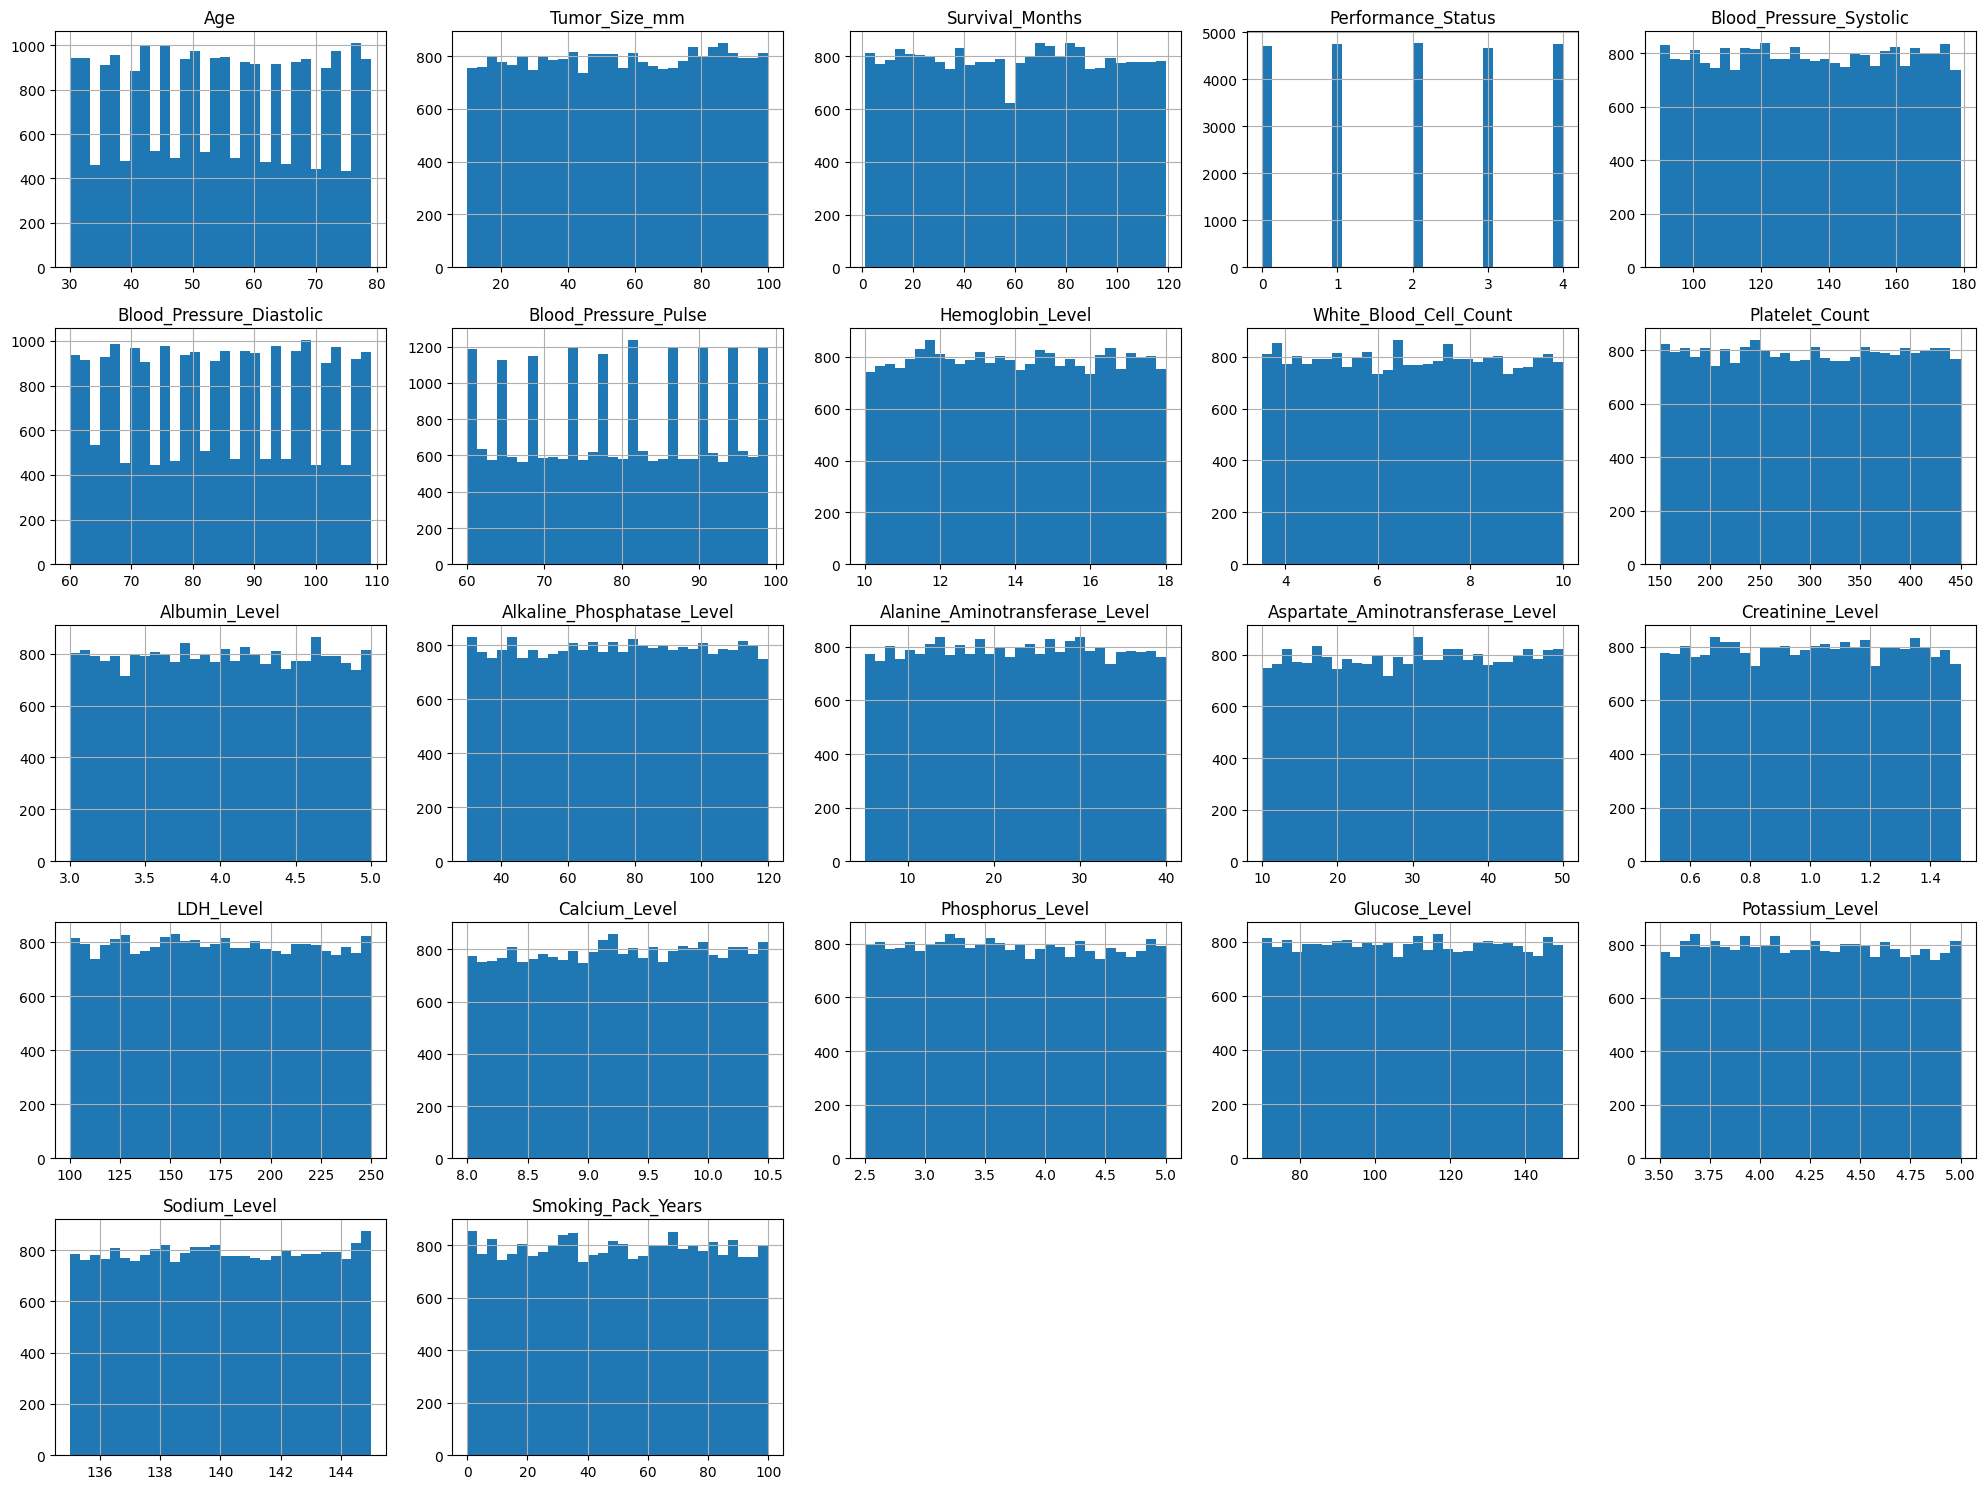

In [7]:
data.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

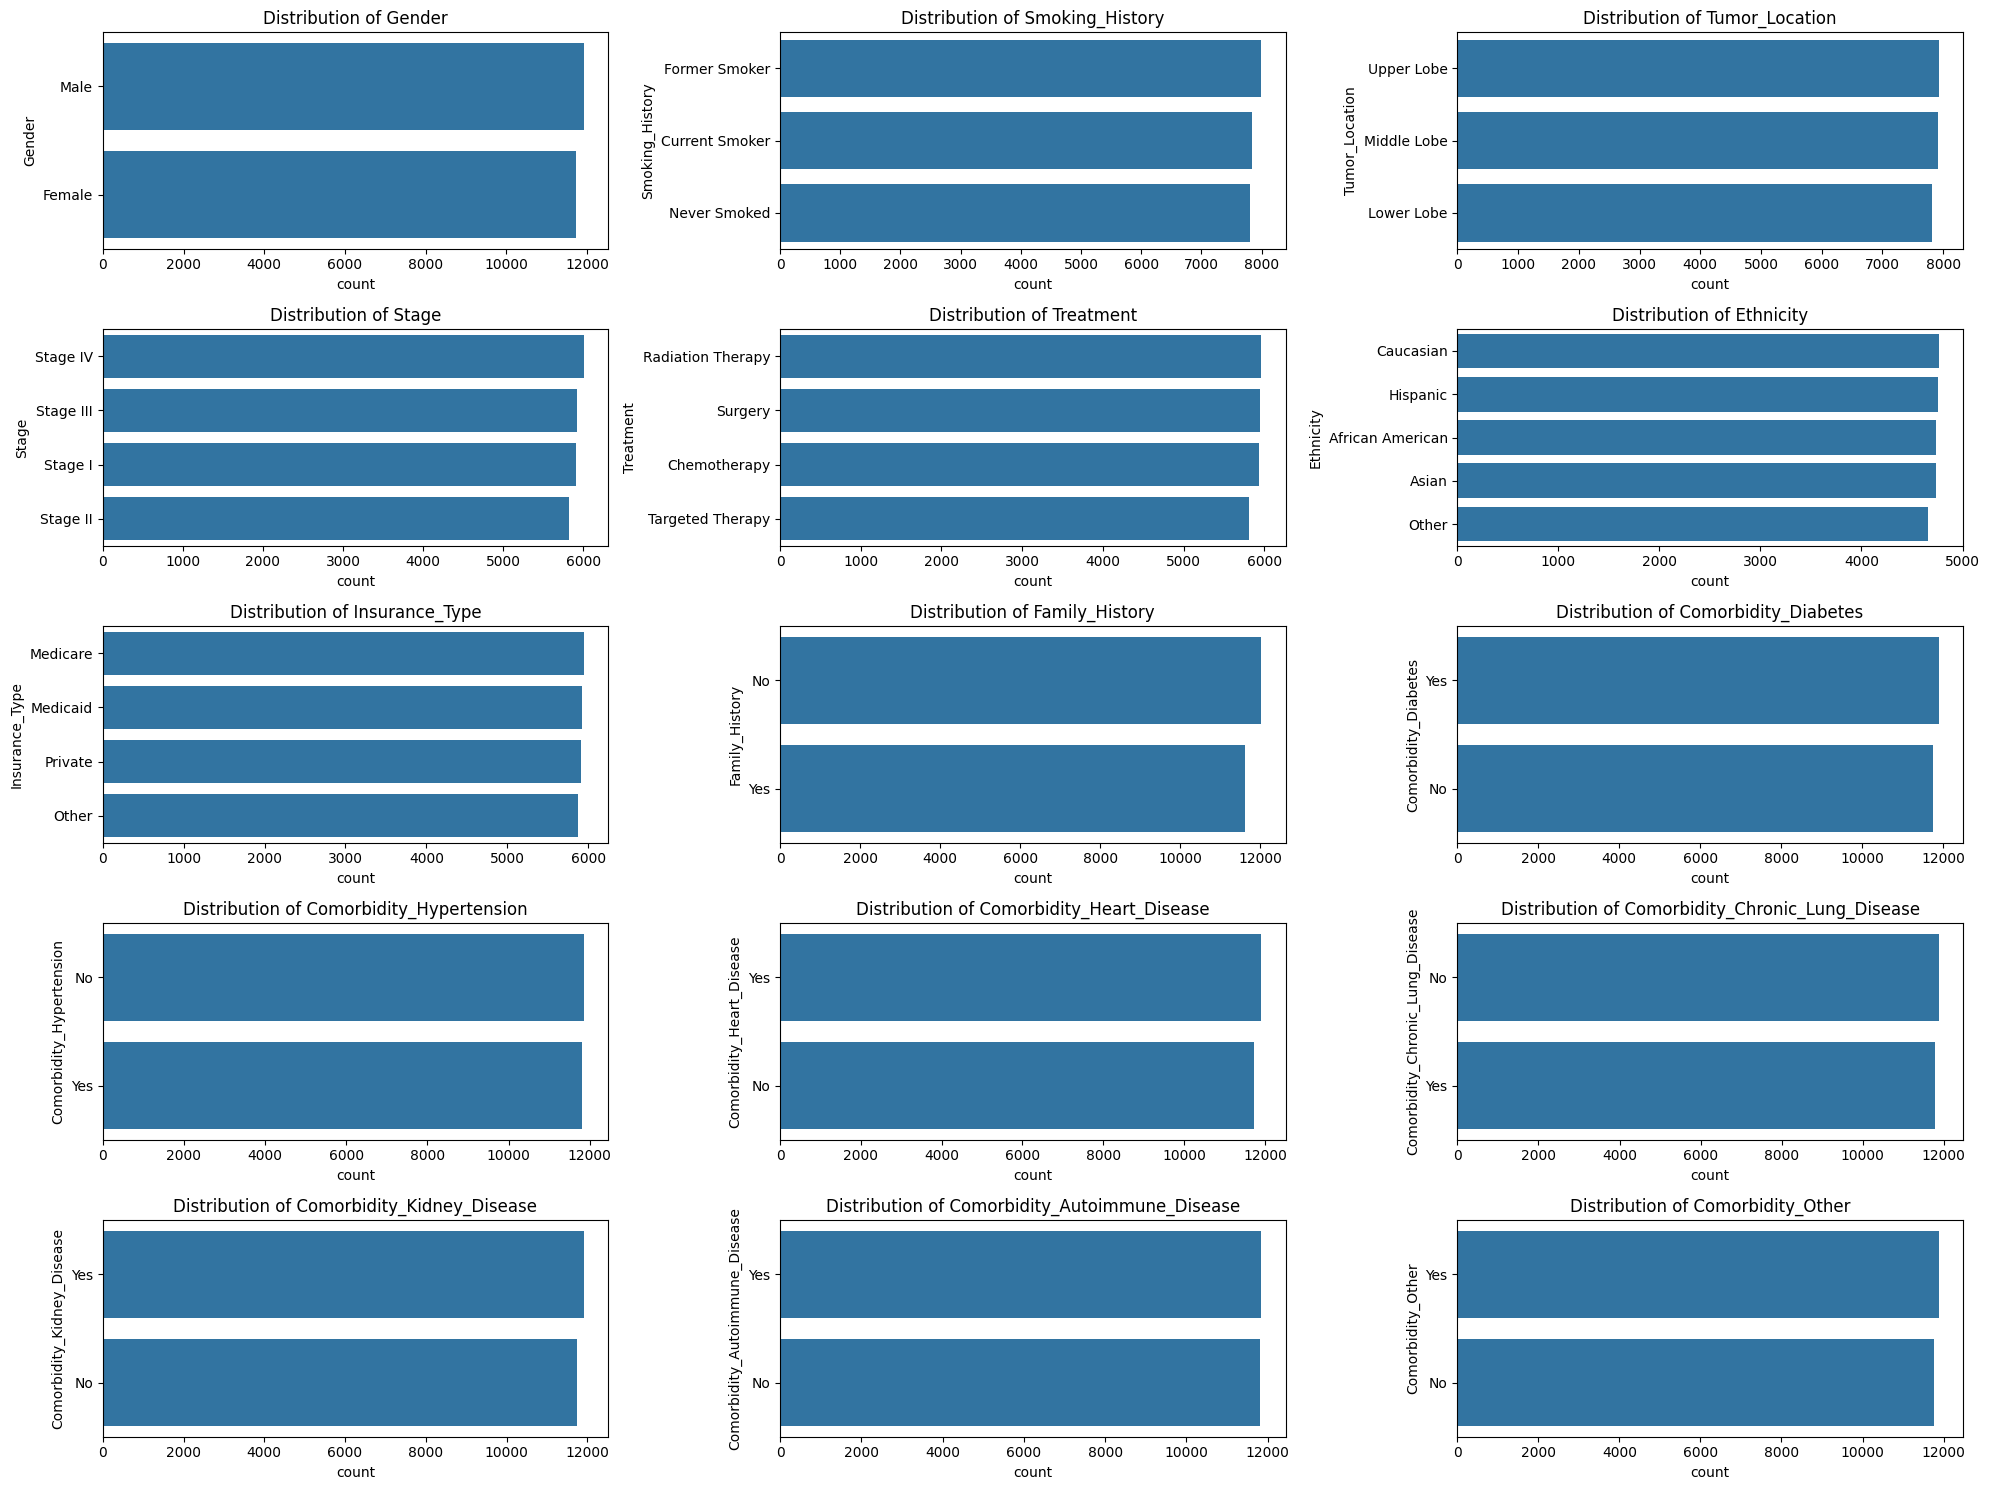

In [8]:
category_data = data.select_dtypes(include='object')
categorical_columns = category_data.columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(5, 3, i)
    sns.countplot(y=category_data[col], order=category_data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

<Axes: xlabel='Stage', ylabel='Count'>

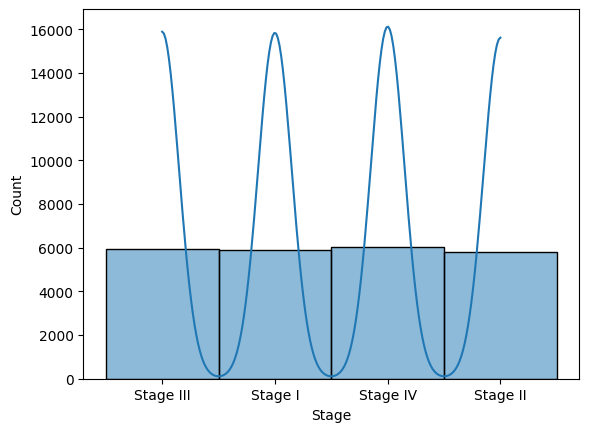

In [9]:
sns.histplot(data['Stage'], kde=True)

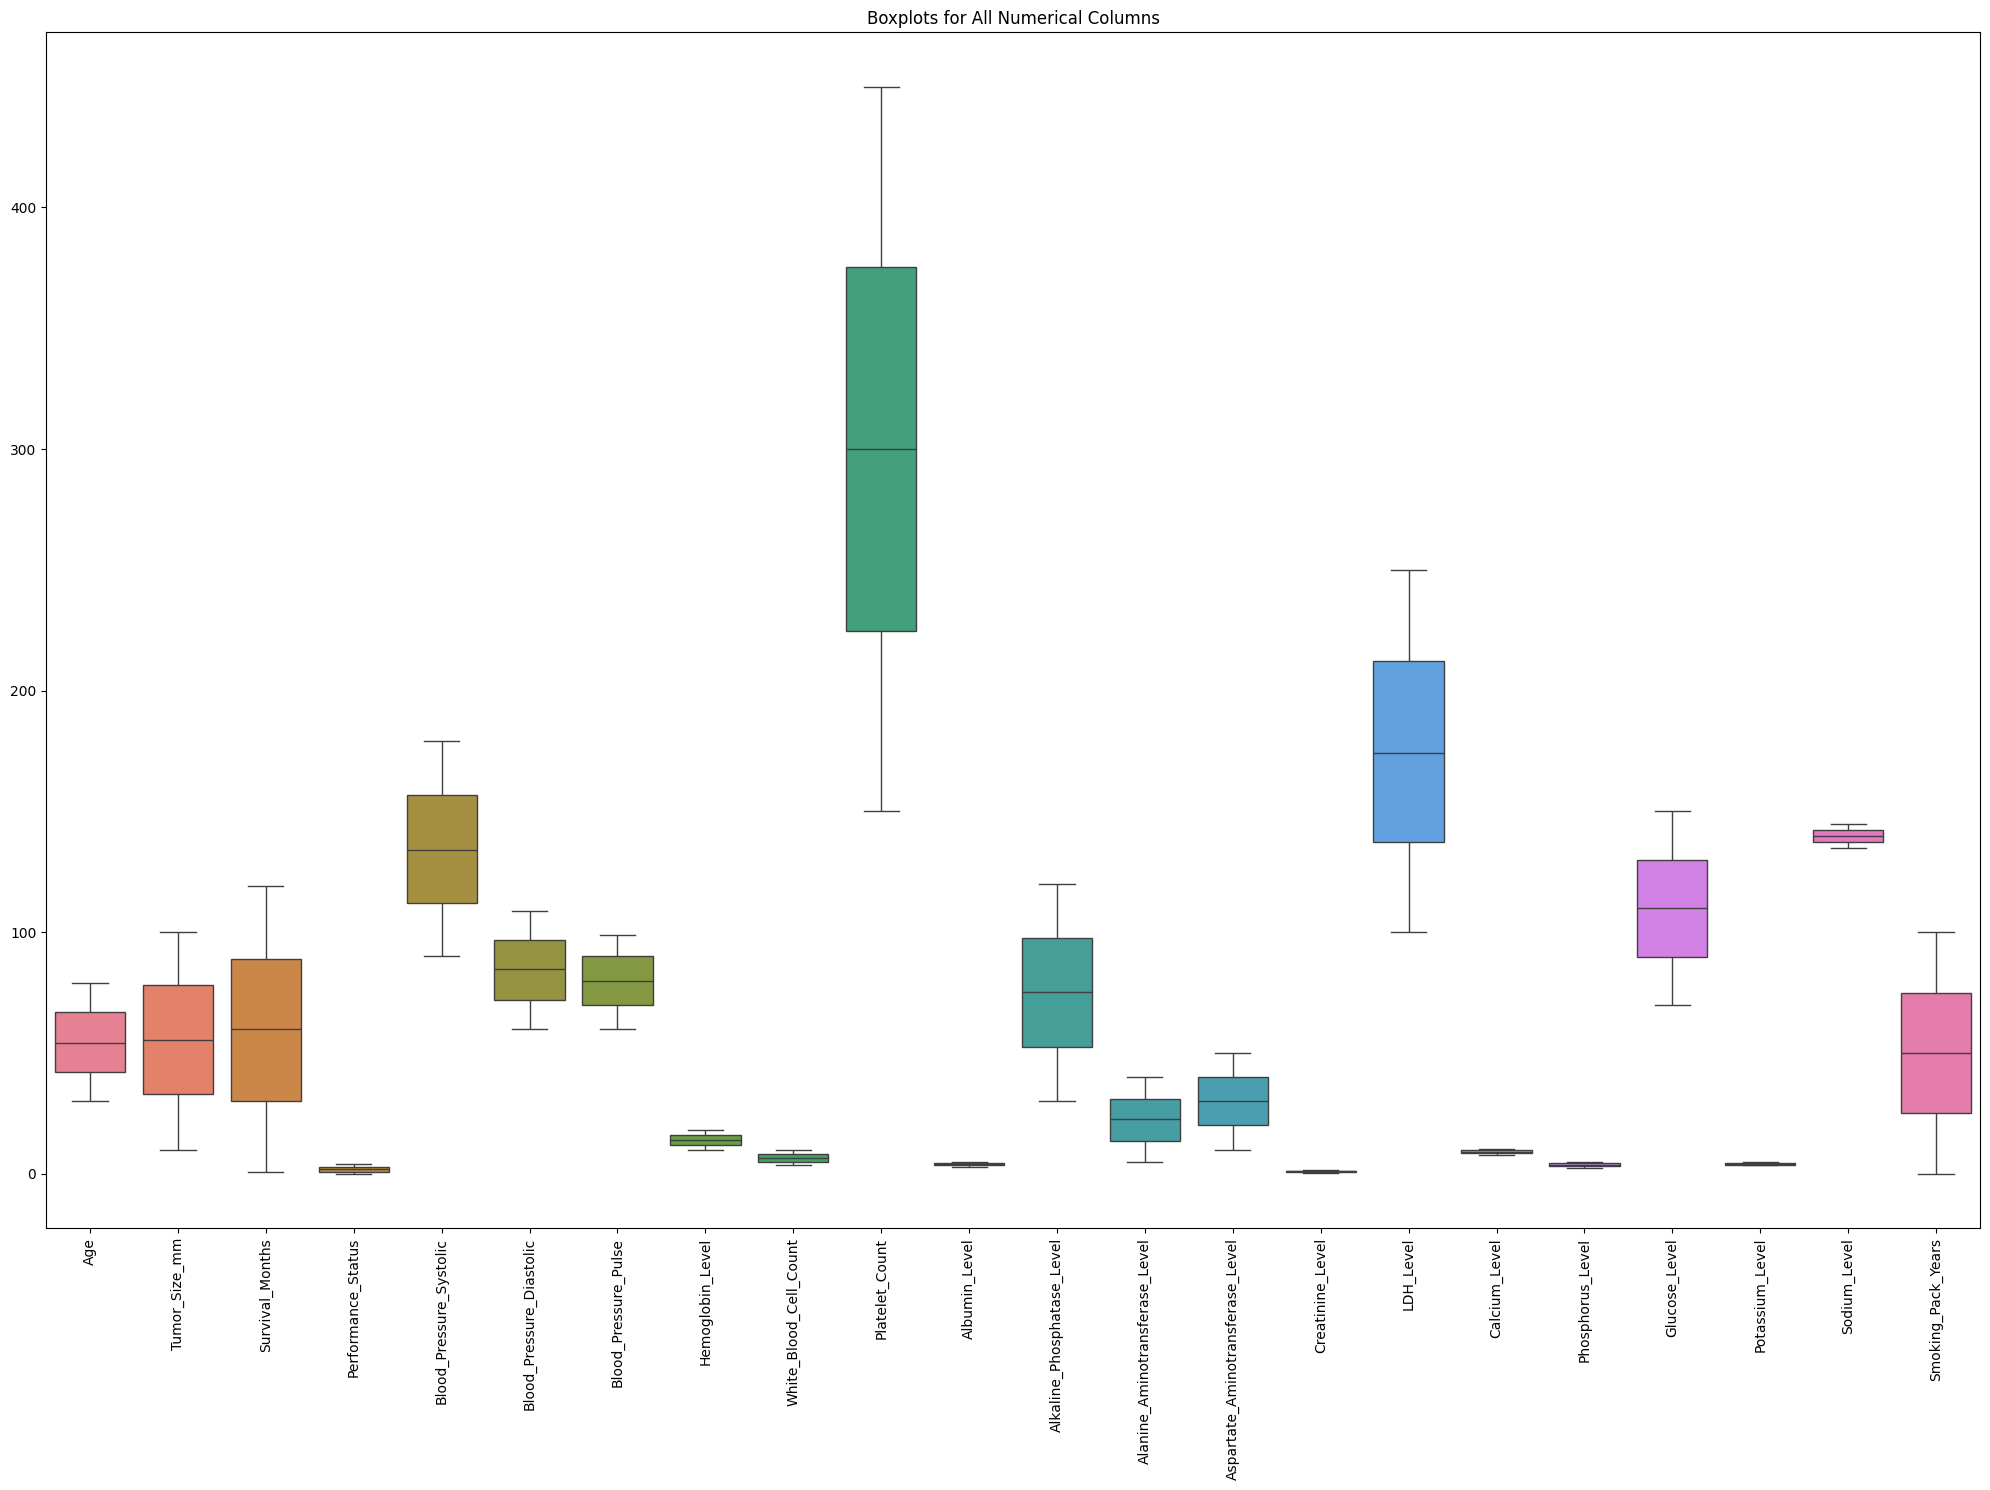

In [10]:
plt.figure(figsize=(20, 15))
sns.boxplot(data=data)
plt.title('Boxplots for All Numerical Columns')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.tight_layout()
plt.show()

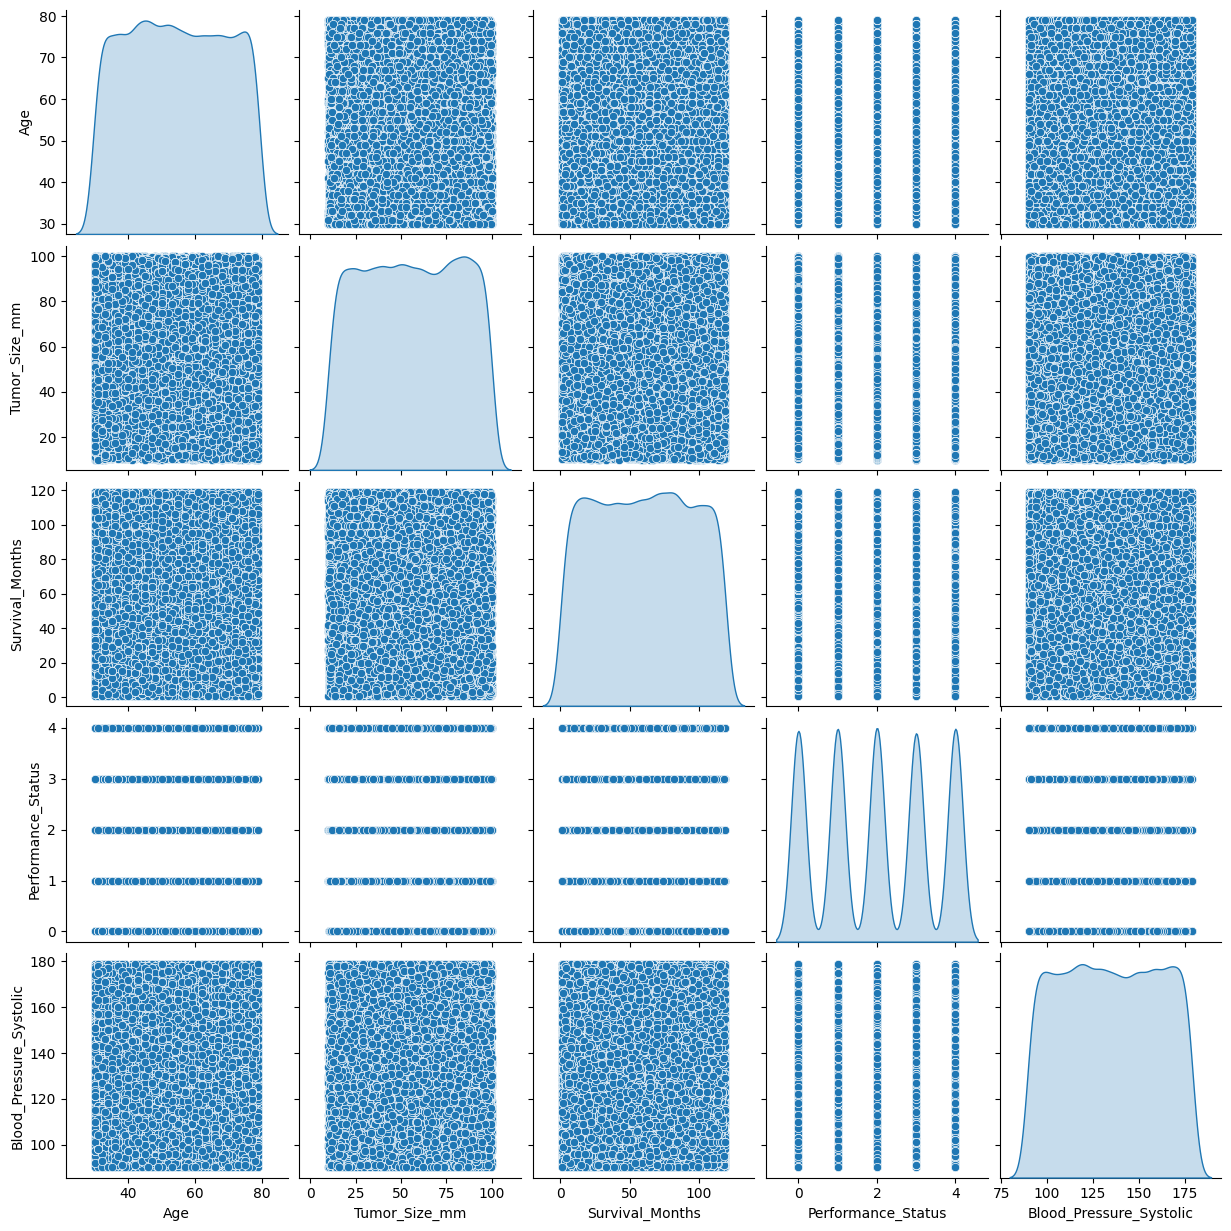

In [21]:
sns.pairplot(data.iloc[:,0:6], diag_kind="kde")

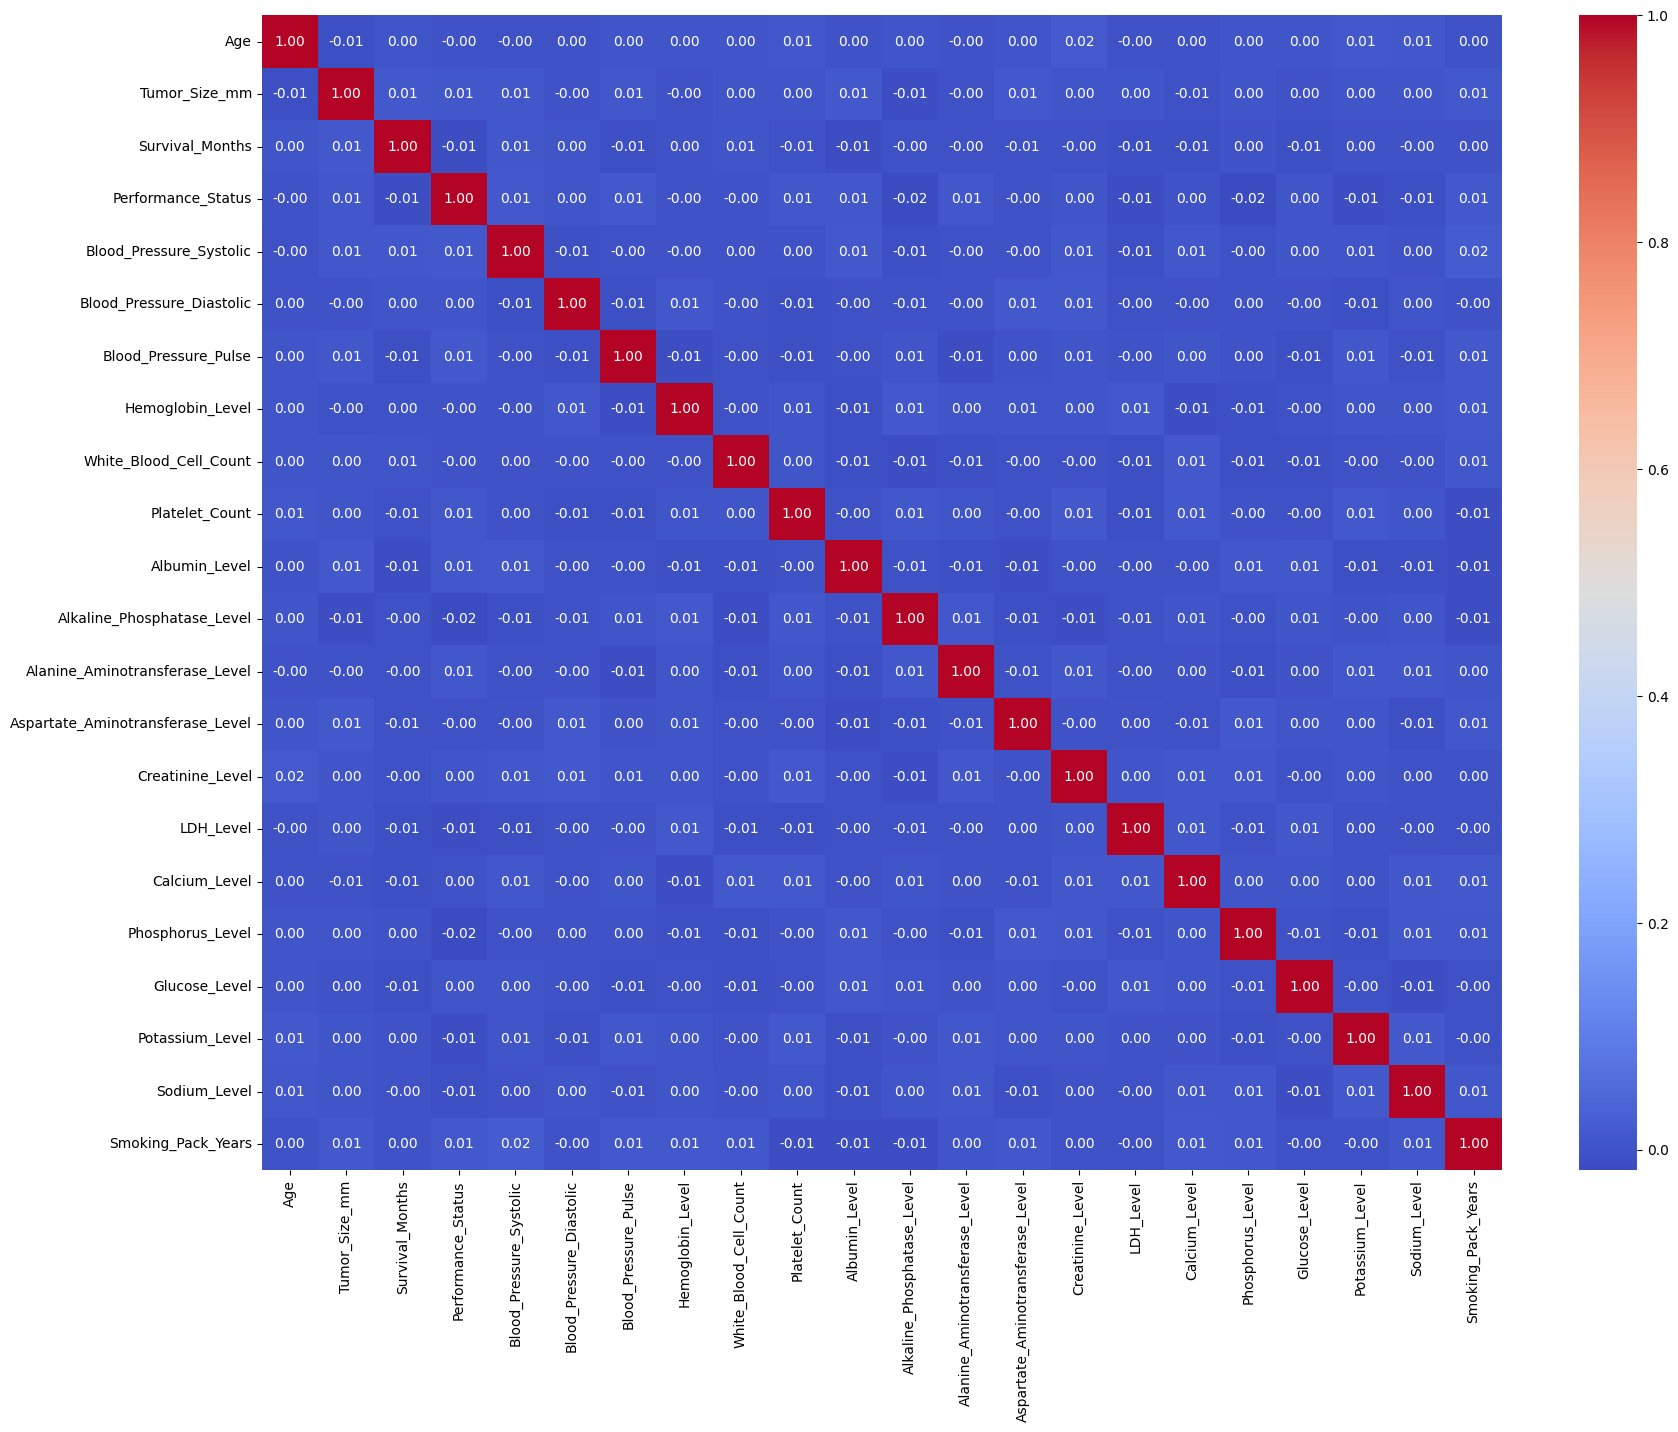

In [12]:
correlation_matrix = data.select_dtypes(include=['float64', 'int64']).corr()

plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [16]:
from sklearn.preprocessing import OneHotEncoder

objects = data.select_dtypes(include=["object"])
objects_col = list(objects.columns)
objects_col.remove('Stage')

encoder = OneHotEncoder(drop='first', sparse_output=False)
data_encoded = encoder.fit_transform(data[objects_col])
data_encoded = pd.DataFrame(data_encoded, columns=encoder.get_feature_names_out(objects_col))

data = data.drop(columns=objects_col).join(data_encoded)
data.head()

# data = pd.get_dummies(data, columns = objects_col)
# data = data.map(lambda x: int(x) if isinstance(x, bool) else x)
# data

,Age,Tumor_Size_mm,Stage,Survival_Months,Performance_Status,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Blood_Pressure_Pulse,Hemoglobin_Level,White_Blood_Cell_Count,...,Insurance_Type_Other,Insurance_Type_Private,Family_History_Yes,Comorbidity_Diabetes_Yes,Comorbidity_Hypertension_Yes,Comorbidity_Heart_Disease_Yes,Comorbidity_Chronic_Lung_Disease_Yes,Comorbidity_Kidney_Disease_Yes,Comorbidity_Autoimmune_Disease_Yes,Comorbidity_Other_Yes
0,68,81.678677,Stage III,44,3,161,99,92,13.538000,9.800707,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0
1,58,78.448272,Stage I,101,4,101,91,93,16.800312,4.378428,...,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,44,67.714305,Stage I,69,0,109,74,81,14.473493,6.157792,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,72,70.806008,Stage III,95,1,103,85,68,17.442063,6.259383,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
4,37,87.272433,Stage IV,105,0,165,69,99,13.545171,5.203516,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

X = data.drop('Stage', axis=1)
y = data['Stage']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on Test Set: 0.25570583262890956

Classification Report:
               precision    recall  f1-score   support

     Stage I       0.24      0.28      0.26      1145
    Stage II       0.24      0.24      0.24      1153
   Stage III       0.27      0.25      0.26      1230
    Stage IV       0.27      0.26      0.26      1204

    accuracy                           0.26      4732
   macro avg       0.26      0.26      0.26      4732
weighted avg       0.26      0.26      0.26      4732



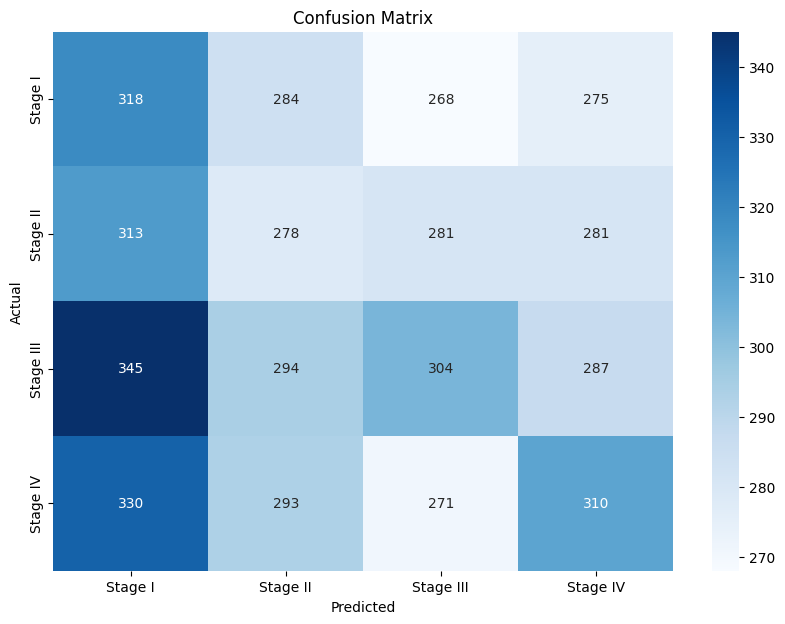

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

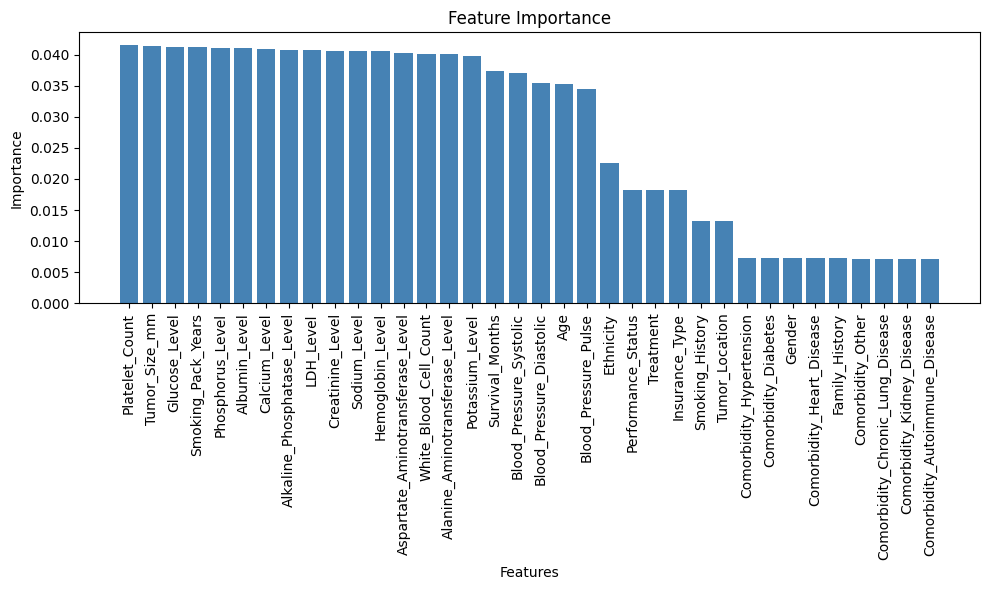

In [18]:
feature_importances = rf.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

feature_mapping = {}
for original_col in objects_col:
    for encoded_col in encoder.get_feature_names_out(objects_col):
        if encoded_col.startswith(original_col + "_"):
            feature_mapping.setdefault(original_col, []).append(encoded_col)

# Aggregate importance of one-hot encoded categorical features
aggregated_importance = {}
for original_col, encoded_cols in feature_mapping.items():
    aggregated_importance[original_col] = importance_df[importance_df['Feature'].isin(encoded_cols)]['Importance'].sum()

# Keep numerical features' importance
numerical_features = [feat for feat in X.columns if feat not in encoder.get_feature_names_out(objects_col)]
for num_feat in numerical_features:
    aggregated_importance[num_feat] = importance_df[importance_df['Feature'] == num_feat]['Importance'].sum()

# Convert to DataFrame and sort
aggregated_importance_df = pd.DataFrame(list(aggregated_importance.items()), columns=['Feature', 'Importance'])
aggregated_importance_df = aggregated_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(aggregated_importance_df['Feature'], aggregated_importance_df['Importance'], color='steelblue')
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()